## Domain Analysis

1)Identifiers
Id: A unique identifier for each player or entry in the dataset.
groupId: A unique identifier for the player's team or group.
matchId: A unique identifier for the match in which the player participated.

2)Player Performance Metrics
assists: The number of kills the player assisted teammates in achieving.
boosts: The number of boost items (like energy drinks or painkillers) used by the player during the match.
damageDealt: The total amount of damage the player inflicted on opponents.
DBNOs: Stands for "Down But Not Out" - the number of times the player knocked down opponents (doesn't necessarily mean a kill).
headshotKills: The number of kills achieved via headshots.
heals: The number of healing items (like first aid kits, med kits, or bandages) used by the player.

3)Kill-Related Stats
killPlace: The rank of the player based on the number of kills (lower rank = more kills).
killPoints: Points awarded for the player’s kills, often used in ranking or competitive play.
kills: The total number of opponents eliminated by the player.
killStreaks: The maximum number of kills the player achieved in a short period.
longestKill: The longest distance (in meters) over which the player successfully killed an opponent.

4)Match Metrics
matchDuration: The total duration of the match in seconds.
matchType: The mode or type of match, such as solo, duo, squad, or custom game.

5)Team & Group Stats
maxPlace: The maximum placement number in the match (e.g., if there are 100 players, maxPlace could be 100).
numGroups: The total number of teams or groups in the match.

6)Ranking Points
rankPoints: The player's ranking points based on their performance, often used for matchmaking or leaderboards.
winPoints: Points awarded based on the player's placement in the match.
winPlacePerc: The normalized placement of the player within the match, where 1.0 indicates first place and 0.0 indicates last place.

7)Reviving & Team Interaction
revives: The number of times the player revived a knocked-down teammate.
teamKills: The number of kills the player achieved against their own teammates (friendly fire).

8)Travel Metrics
rideDistance: The total distance (in meters) traveled by the player using vehicles.
swimDistance: The total distance (in meters) swum by the player.
walkDistance: The total distance (in meters) traveled on foot.

9)Other Stats
roadKills: The number of kills achieved by running over opponents with vehicles.
vehicleDestroys: The number of vehicles destroyed by the player.
weaponsAcquired: The total number of weapons picked up by the player during the match.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import sweetviz as sv
%matplotlib inline

In [2]:
data=pd.read_csv('pubg.csv')

## Basic Checks

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
data.head(pd.set_option('display.max_columns',None))

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [6]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [9]:
data.describe(include=['O'])

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [10]:
no_matches=data.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47965 matches registered in our database.


In [11]:
m_types=data.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns=["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


## 2.EDA(Exploratory Data Analysis)

### 1.univerate analysis

### Analysing the Kills

In [12]:

print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(data['kills'].mean(),data['kills'].quantile(0.99), data['kills'].max()))

On an average a person kills 0.9248 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


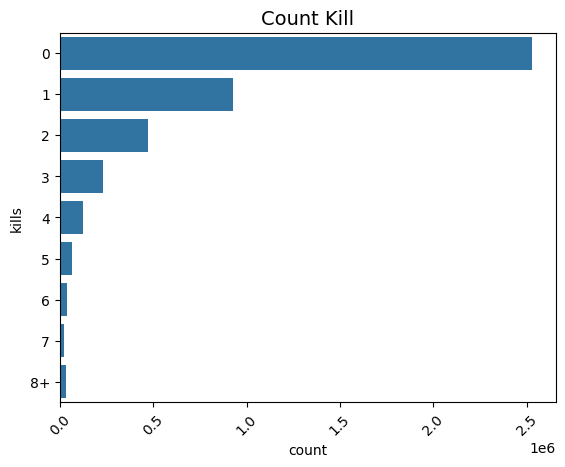

In [13]:
# Countplot to show the kills distribution
import itertools
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'

sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Count Kill",fontsize=14)
plt.xticks(rotation=45)
plt.show()

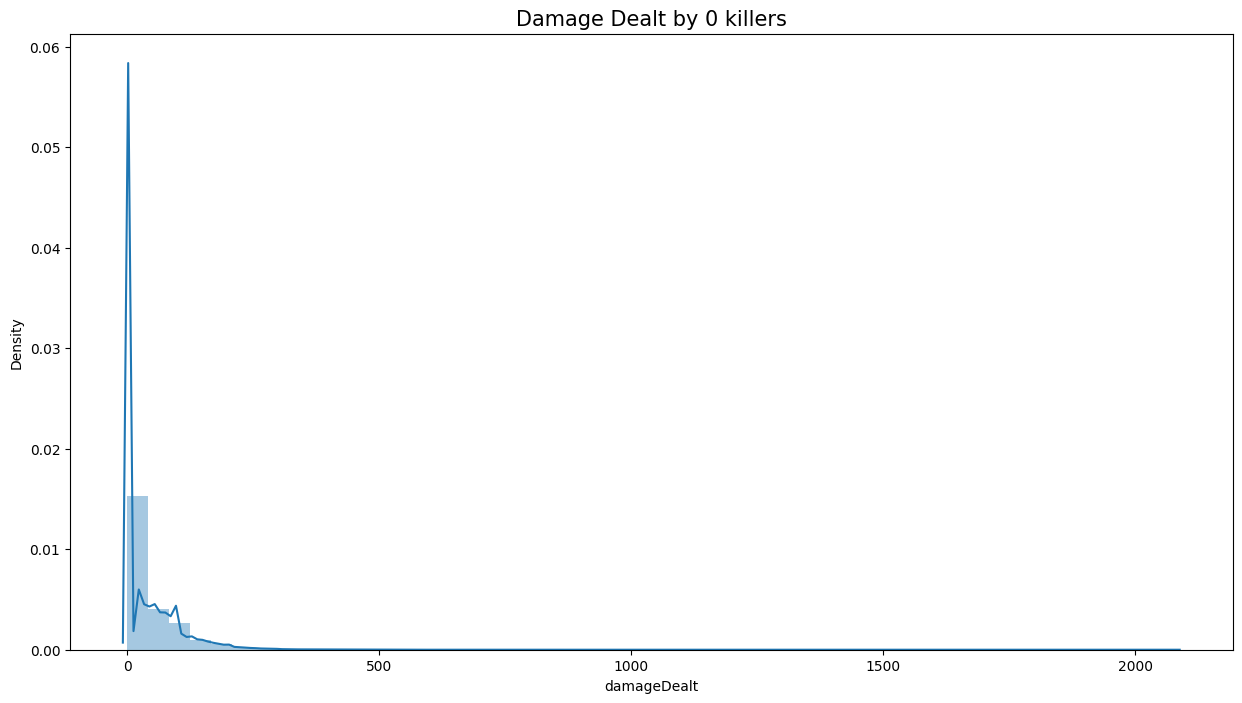

In [14]:
# Damage Dealt by 0 killers
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

## Analysing Running

In [15]:

print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(data)))

98054 players (3.8761%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


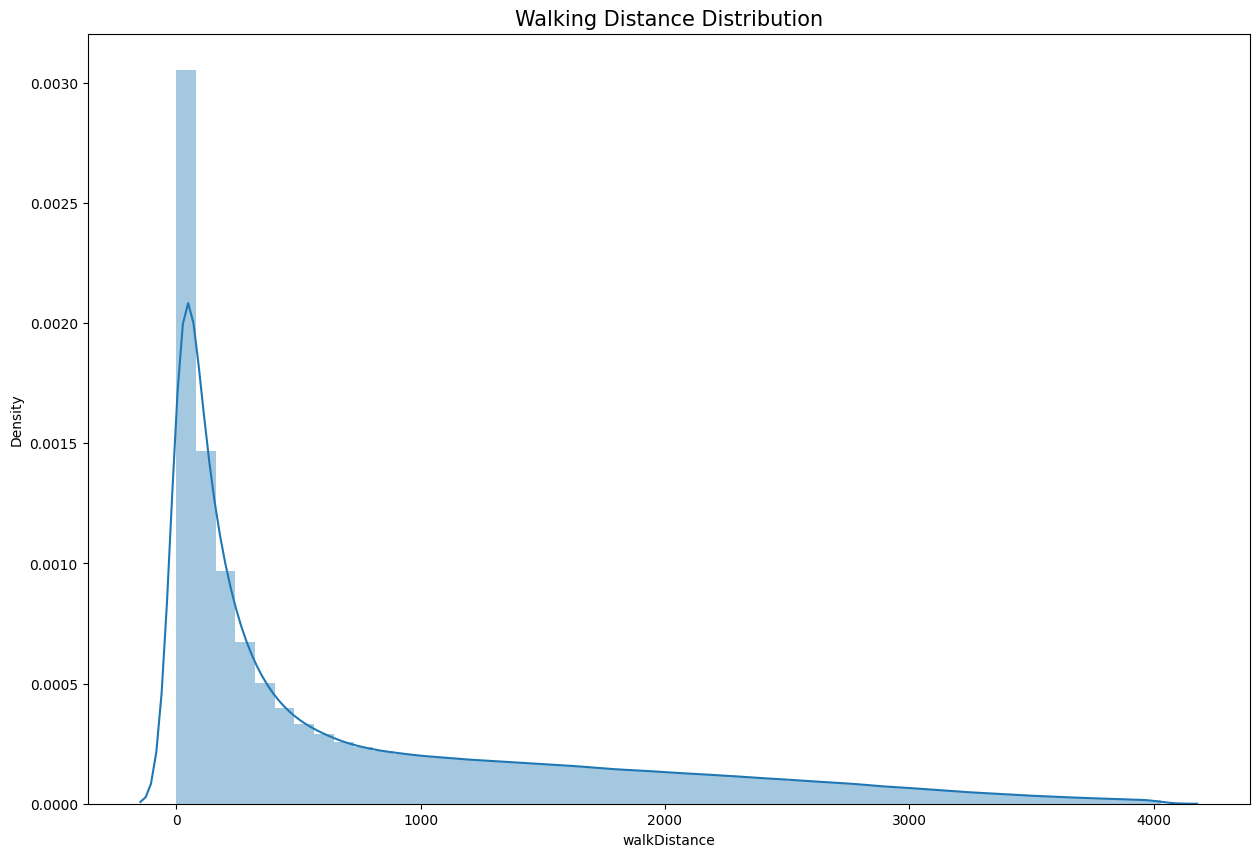

In [16]:
# analysis walkDistance
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

## match distribution

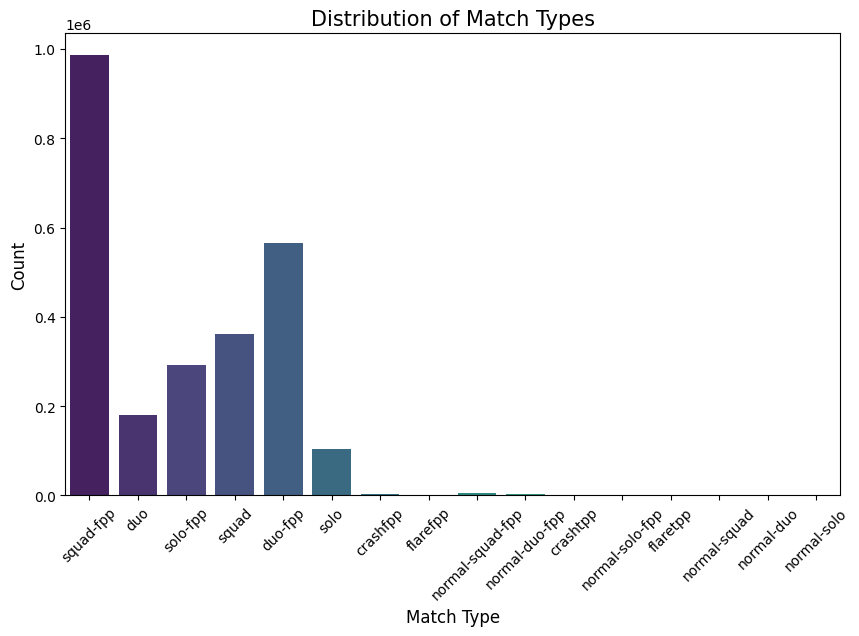

In [17]:
# Countplot to show the matchType distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='matchType', data=data, palette='viridis')
plt.title('Distribution of Match Types', fontsize=15)
plt.xlabel('Match Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [18]:
m_types2 = data["matchType"].value_counts().to_frame(name="count")
aggregated_squads = m_types2.loc[["squad-fpp", "squad", "normal-squad-fpp", "normal-squad"], "count"].sum()
aggregated_duos = m_types2.loc[["duo-fpp", "duo", "normal-duo-fpp", "normal-duo"], "count"].sum()
aggregated_solo = m_types2.loc[["solo-fpp", "solo", "normal-solo-fpp", "normal-solo"], "count"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads, aggregated_duos, aggregated_solo],index=["squad", "duo", "solo"],columns=["total_matches"])

print(aggregated_mt)

       total_matches
squad        1352188
duo           749678
solo          396629


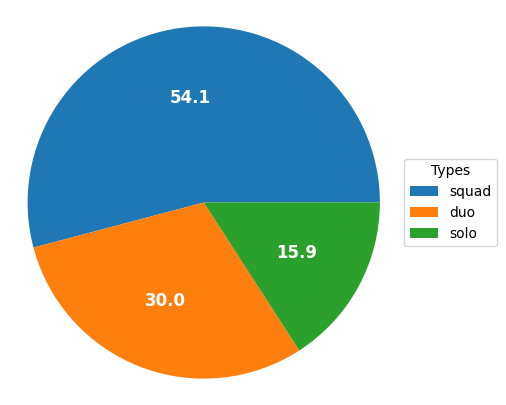

In [19]:
fig1, ax1 = plt.subplots (figsize=(5,5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts= ax1.pie(aggregated_mt["total_matches"], textprops=dict(color="w"), autopct='%1.1f')
                                  
ax1.axis('equal')
ax1.legend (wedges, labels,
            title="Types",
            loc="center left",
            bbox_to_anchor= (1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [20]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m" .format(data['longestKill'].mean(),data['longestKill'].quantile(0.95),data['longestKill'].max()))

Average longest kill distance a player achieve is 0.0m, 95% of them not more than 0.0m and a maximum distance is 0.0m


In [21]:
my_report = sv.analyze(data)

# Show the report as an HTML file
my_report.show_html("my_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1)
444666 rows
0 dulpicate
2GB RAM
29 features
2 categorical
24 numericals
3 text

2)assists have range 22.zeroes are 82%

3)boots have 57% zeroes.having range 33.IQR 2

4)damage range is 6616.average is 131 and IQR is 186

5)DBNOs have 62% zeroes.max is 53. avg is 0.7 and IQR is 1.

6)headshotkills have max 64 kills.avg is 0.2

7)heals range is 80.IQR is 2 and average is 1.4

8)kill place max is 101.which is corrupted beacuse maximum players in match is only 100. range 100.avg is 48 and median 47

9)kilss have 57% zeroes .max is 72 which is rare. 95% players have 4 kills and avg is 0.9

10)killsteaks have max 20.avg 0.5 IQR 1

11)longestkill range is 1094m.avg is 23 and median is 0

12)matchduration max is 2237s.range 2228s.avg is 15580s and median is 1438s

13)killpoints max 2170 avg is 505 and IQR is 1172

14)revives max 39 avg 0.2

15)ride distance max 40710 and avg is 606

16)road kills max 18 and avg is 0

17)match Type
squad fpp 39%
duo fpp 22%
squad 14%
solo fpp 12%
duo 7%
solo 4%

18)team kills max 12

19)weaponsaquired max 236 avg is 4 and median is 3

20)winplaceperc having one missing value. max is 1 and avg is 0.47

### 2.bivariate analysis

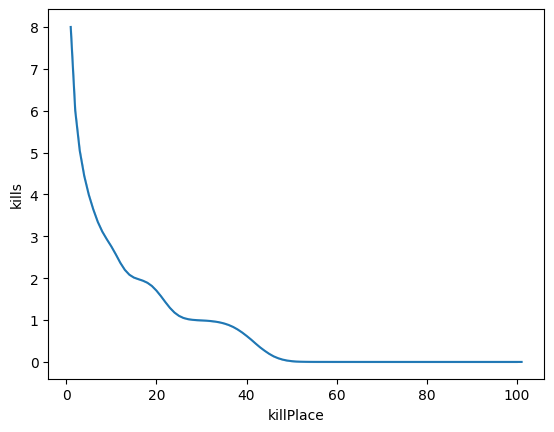

In [3]:
sns.lineplot(x="killPlace",y="kills",data=data)
plt.show()

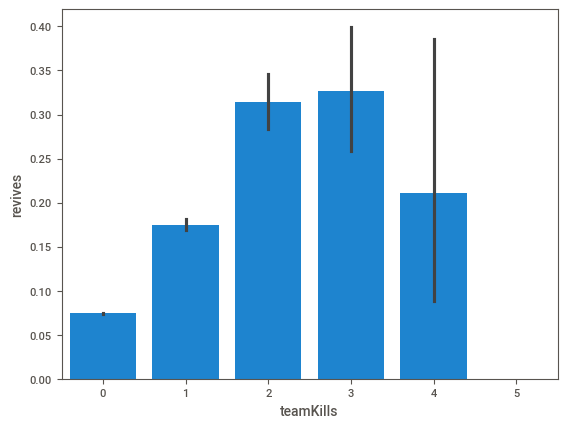

In [23]:
sns.barplot(x="teamKills",y="revives",data=data)
plt.show()

#### Analysing Running: Effect of Running on Winning Percentage

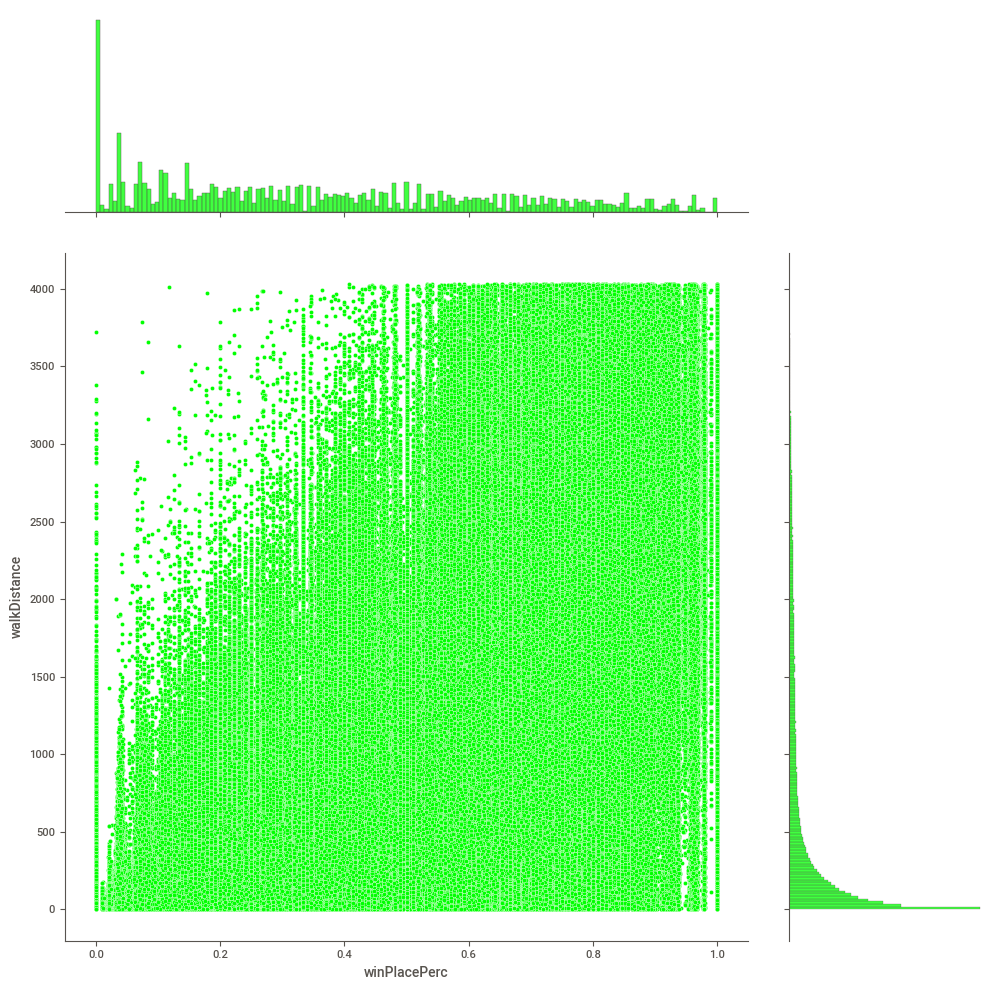

In [24]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=data, height=10, ratio=3, color="lime")
plt.show()

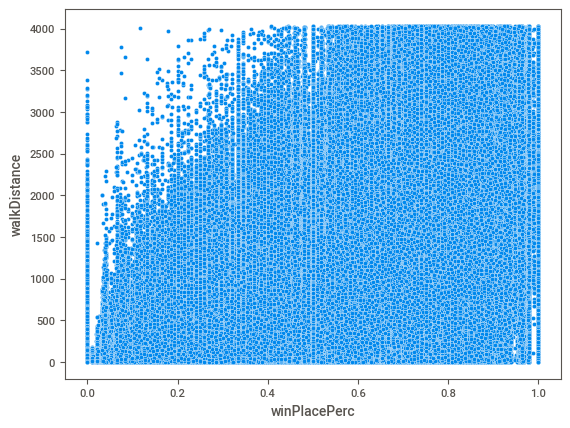

In [25]:
sns.scatterplot(x="winPlacePerc", y="walkDistance",  data=data)
plt.show()

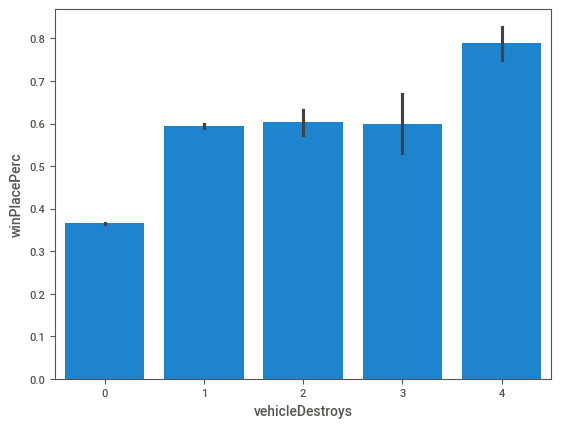

In [26]:
#analysis of vehicledestroys by winPlacePerc
sns.barplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.show()

In [27]:
#players in match and group
import itertools
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = data.groupby(['matchType','matchId']).size().to_frame('players in match')
group = data.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['players in group'],['min','mean','max'])]], axis=1)

players in match                  players in group            \
                              min       mean   max              min      mean   
matchType                                                                       
crashfpp                     14.0  52.273973  66.0              1.0  1.647668   
crashtpp                     32.0  41.000000  50.0              1.0  1.553030   
duo                          18.0  53.893623  68.0              1.0  1.632993   
duo-fpp                       5.0  53.292938  82.0              1.0  1.619642   
flarefpp                     33.0  45.000000  55.0              1.0  2.664474   
flaretpp                     35.0  50.517241  61.0              1.0  2.738318   
normal-duo                    1.0   8.333333  22.0              1.0  1.470588   
normal-duo-fpp                1.0  21.269231  54.0              1.0  1.517563   
normal-solo                   1.0   4.142857  14.0              1.0  1.035714   
normal-solo-fpp               1.0   5.402778  27.0              1.0  1.040107   
normal-squad                  1.0   9.571429  53.0              1.0  1.942029   
normal-squad-fpp              1.0  19.093093  61.0              1.0  2.317900   
solo                          8.0  45.720070  64.0              1.0  1.125509   
solo-fpp                      1.0  51.270118  72.0              1.0  1.032687   
squad                        11.0  54.143887  68.0              1.0  2.501961   
squad-fpp                     3.0  53.036499  70.0              1.0  2.419168   

                        
                   max  
matchType               
crashfpp           9.0  
crashtpp           7.0  
duo               16.0  
duo-fpp           58.0  
flarefpp          13.0  
flaretpp          14.0  
normal-duo         3.0  
normal-duo-fpp     7.0  
normal-solo        3.0  
normal-solo-fpp    6.0  
normal-squad       7.0  
normal-squad-fpp  46.0  
solo              21.0  
solo-fpp          50.0  
squad             23.0  
squad-fpp         31.0

### Analysing Riding

In [28]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

An average person drives for 474.9m, 99% of people have drived 6605.0m or less, while THE RIDER rode for 40710.0m.


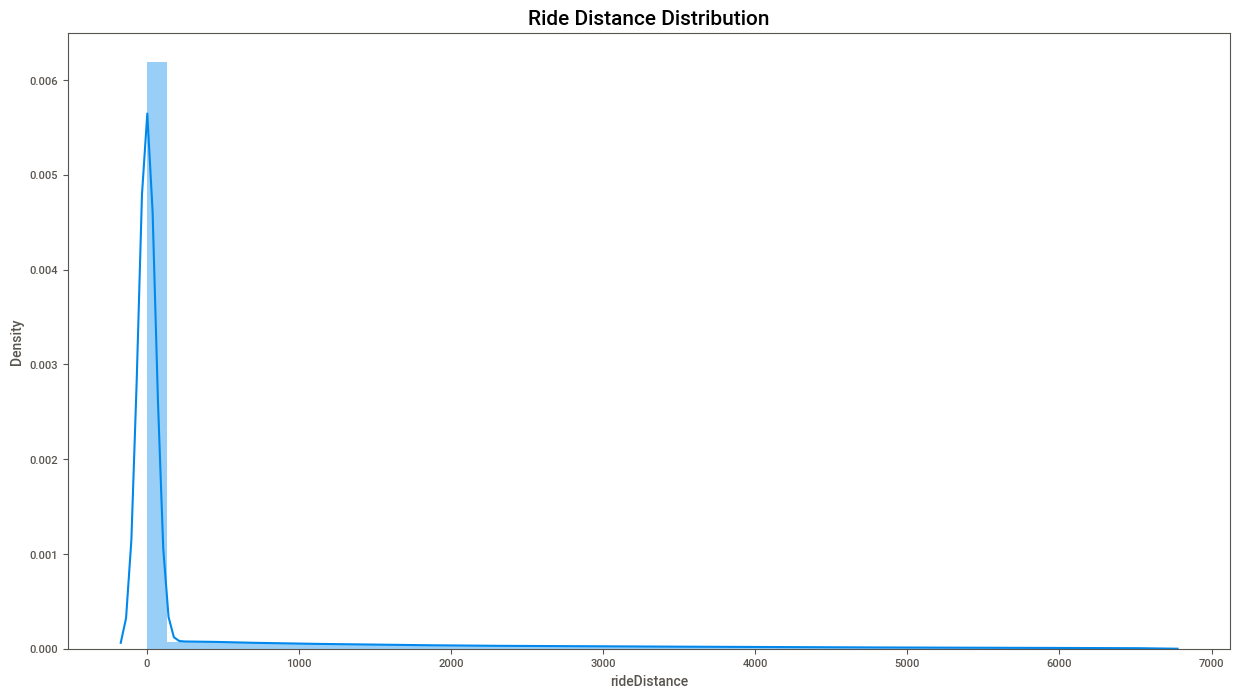

In [29]:
data = data.copy()
data = data[data['rideDistance'] < data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

### Analysing Healing and Boosting

In [30]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

In the game on an average a person uses 0.7 heal items, 99% of people use 9.0 or less, while the doctor used 80.
In the game on an average a person uses 0.5 boost items, 99% of people use 5.0 or less, while the doctor used 28.


# Game Winning Prediction

# data preprocessing

In [3]:
# check null values in data
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
# drop null value from data
data.drop(data[data['winPlacePerc'].isnull()].index, inplace=True)

### drop identifer columns

In [5]:
#drop column Id,groupid,matchid beause of the identifer column not more impact on output 
data.drop('Id',axis=1,inplace=True)
data.drop('groupId',axis=1,inplace=True)
data.drop('matchId',axis=1,inplace=True)

### preprocessing kills columns

In [6]:
# Engineer a new feature _totalDistance
data['_totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

In [7]:
#Create a new feature 'headshot_rate'. We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!
# Engineer _headshot_rate feature --- headshots made per kill
data['_headshot_rate'] = data['headshotKills'] / data['kills']
data['_headshot_rate'] = data['_headshot_rate'].fillna(0)

In [8]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?
data[(data['kills'] >= 40) & (data['weaponsAcquired'] > 55) & (data['_totalDistance'] < 100.0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
156599,21,0,5479.0,0,12,7,4,0,48,6,...,0,0.0,0,0,23.71,61,0,0.7000,23.71,0.250000
672993,10,0,5793.0,0,5,2,1,0,57,5,...,0,0.0,0,0,24.27,56,0,1.0000,24.27,0.087719
770454,12,0,5557.0,0,7,4,1,0,55,6,...,0,0.0,0,0,85.55,66,0,1.0000,85.55,0.127273
1378200,9,0,3707.0,0,5,1,5,0,41,4,...,0,0.0,0,0,46.71,72,0,0.7778,46.71,0.121951


In [9]:
# Is it even possible to kill more than 40 people without using any heals?
data[(data['kills'] >= 40) & (data['heals'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
160254,1,0,4033.0,0,40,0,1,1000,42,5,...,0,0.0,1,0,718.3,16,1500,1.0,718.3,0.952381
2105633,8,0,4272.0,40,34,0,1,0,43,9,...,0,0.0,0,0,80.4,21,0,1.0,80.4,0.790698
2316123,8,0,4106.0,31,3,0,1,0,40,6,...,0,0.0,0,0,1282.0,22,0,1.0,1282.0,0.075000
2601666,5,0,4347.0,0,31,0,1,0,53,8,...,0,0.0,0,0,134.3,36,0,1.0,134.3,0.584906
3924729,1,2,3680.0,0,35,0,1,1000,40,20,...,0,0.0,0,0,1180.0,2,1500,1.0,1180.0,0.875000


In [10]:
# Drop 'fraudsters' with inhumane kill counts
data.drop(data[(data['kills'] >= 40) & (data['weaponsAcquired'] > 55) & (data['_totalDistance'] < 100.0)].index, inplace=True)
data.drop(data[(data['kills'] >= 40) & (data['heals'] == 0)].index, inplace=True)

## preprocess 100% Headshot Kills

In [11]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)
display(data[(data['_headshot_rate'] == 1) & (data['kills'] >=10)].shape)
data[(data['_headshot_rate'] == 1) & (data['kills'] >= 10)].head(10)

(24, 28)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
281570,2,3,1212.0,8,10,0,1,0,10,4,...,0,0.0,0,0,2939.0,5,0,0.8462,2939.0,1.0
346124,3,5,1620.0,13,11,3,1,1424,11,2,...,0,0.0,0,0,3422.0,8,1560,1.0000,8142.0,1.0
871244,0,4,1365.0,9,13,0,1,1579,13,2,...,0,0.0,0,0,2105.0,5,1587,1.0000,2105.0,1.0
908815,2,5,1535.0,10,10,3,1,1393,10,3,...,0,0.0,2,0,2761.0,7,1519,0.9630,7948.0,1.0
963463,2,6,1355.0,12,10,2,1,1543,10,2,...,0,0.0,0,0,2458.0,4,1562,1.0000,3476.0,1.0
1079403,0,5,1218.0,8,11,3,1,0,11,3,...,0,0.0,0,0,2932.0,4,0,1.0000,8178.0,1.0
1167959,0,4,1065.0,6,10,1,1,1391,10,2,...,0,0.0,0,0,2450.0,7,1468,1.0000,2858.9,1.0
1348164,1,5,1319.0,11,12,1,1,0,12,2,...,0,0.0,0,0,3915.0,5,0,1.0000,5963.0,1.0
1380385,1,4,1150.0,4,11,1,1,1000,11,3,...,0,0.0,0,0,3108.0,7,1500,1.0000,3108.0,1.0
1483199,0,10,1478.0,8,13,2,1,0,13,3,...,0,140.8,0,0,2339.0,4,0,1.0000,2479.8,1.0


In [12]:
# Create feature killsWithoutMoving
data['_killsWithoutMoving'] = ((data['kills'] > 0) & (data['_totalDistance'] == 0))
# Check players who kills without moving
display(data[data['_killsWithoutMoving'] == True].shape)
data[data['_killsWithoutMoving'] == True].head(10)

(1535, 29)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
1824,0,0,593.00,0,0,3,18,0,6,3,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000,True
6673,2,0,346.60,0,0,6,33,0,3,1,...,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000,True
11892,2,0,1750.00,0,4,5,3,0,20,6,...,0.0,0,0,0.0,13,0,0.8947,0.0,0.200000,True
14631,0,0,157.80,0,0,0,69,1000,1,1,...,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000,True
15591,0,0,100.00,0,1,0,37,0,1,1,...,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000,True
20881,0,0,506.10,4,1,3,7,0,6,2,...,0.0,0,0,0.0,8,0,0.8000,0.0,0.166667,True
23298,1,0,1124.00,0,4,1,7,0,12,5,...,0.0,0,0,0.0,8,0,0.6000,0.0,0.333333,True
24640,2,0,529.90,0,2,11,12,0,7,2,...,0.0,0,0,0.0,8,0,0.8571,0.0,0.285714,True
25659,0,1,128.90,0,1,6,53,1000,2,1,...,0.0,0,0,0.0,12,1500,0.2857,0.0,0.500000,True
30079,0,0,85.56,0,0,0,46,0,1,1,...,0.0,0,0,0.0,4,0,0.8571,0.0,0.000000,True


In [13]:
# Drop kill without moving 'fraudsters'
data.drop(data[data['_killsWithoutMoving'] == True].index, inplace=True)

## Longest Kill

In [14]:
data[data['longestKill'] >= 1000]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
202281,0,3,783.9,5,1,1,5,0,4,3,...,0.00,0,1,3052.00,9,0,0.9231,3775.20,0.250000,False
240005,5,0,1284.0,8,5,7,18,1000,11,2,...,0.00,0,0,48.87,38,1500,0.5385,48.87,0.454545,False
324313,2,0,1028.0,0,0,0,9,0,10,2,...,0.00,0,0,1264.00,26,0,1.0000,2981.00,0.000000,False
656553,6,0,1410.0,17,5,0,3,1000,16,4,...,0.00,0,0,29.21,30,1500,0.6000,29.21,0.312500,False
803632,0,0,196.8,0,0,0,51,0,1,1,...,0.00,0,0,1074.00,22,0,0.0000,3159.00,0.000000,False
895411,4,0,1012.0,11,5,0,5,0,10,3,...,0.00,0,0,569.50,18,0,0.9091,569.50,0.500000,False
1172437,2,1,329.3,0,0,2,45,1000,3,1,...,0.00,0,0,832.50,9,1500,0.2857,832.50,0.000000,False
1209416,0,6,1640.0,0,7,0,1,1000,15,2,...,0.00,0,0,2848.00,4,1500,0.9412,2848.00,0.466667,False
1642712,3,2,2103.0,0,4,11,11,0,23,2,...,0.00,0,0,235.30,41,0,0.5000,235.30,0.173913,False
2015559,3,3,1302.0,0,6,5,15,0,11,2,...,0.00,0,0,133.20,43,0,0.6000,133.20,0.545455,False


In [15]:
# Drop longestKill 'fraudsters'
data.drop(data[data['longestKill'] >= 1000].index, inplace=True)

## road kills

In [16]:
# Players who got more than 10 roadKills
data[data['roadKills'] > 10]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
2733926,0,0,1246.0,0,0,0,1,1403,14,13,...,5.297,0,0,1277.0,0,1371,0.4286,1282.302,0.000000,False
2767999,0,0,1102.0,0,0,0,1,1497,11,11,...,0.000,0,0,816.6,5,1533,0.4713,4934.600,0.000000,False
2890740,0,8,2074.0,0,1,11,1,1114,20,18,...,0.000,0,0,3150.0,4,1568,1.0000,5876.000,0.050000,False
3524413,0,3,1866.0,0,5,7,1,1520,18,11,...,0.000,0,0,1041.0,10,1606,0.9398,7853.000,0.277778,False


In [17]:
# Drop roadKill 'fraudsters'
data.drop(data[data['roadKills'] > 10].index, inplace=True)

## Finding anomaly in travelling

In [18]:
data[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,4.445397e+06,4.445397e+06,4.445397e+06
mean,1.154618e+03,6.063238e+02,4.510893e+00
std,1.183508e+03,1.498559e+03,3.050744e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00
50%,6.863000e+02,0.000000e+00,0.000000e+00
75%,1.977000e+03,2.609000e-01,0.000000e+00
max,2.578000e+04,4.071000e+04,3.823000e+03


In [19]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone and how can they travel 13kms in the game?
data[(data['walkDistance'] >= 13000) & (data['kills'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
23026,0,1,0.00,0,0,0,44,0,0,0,...,9.882,0,0,13530.0,7,0,0.8163,13540.3032,0.0,False
497965,0,0,0.00,0,0,0,46,0,0,0,...,381.900,0,0,25780.0,0,0,0.9894,26161.9078,0.0,False
1072113,0,1,0.00,0,0,5,50,0,0,0,...,15.270,1,0,13040.0,4,0,0.6786,13055.2898,0.0,False
1137979,0,2,0.00,0,0,27,41,0,0,0,...,80.340,0,0,13160.0,3,0,0.9643,13240.3948,0.0,False
1188935,0,0,0.00,0,0,0,44,0,0,0,...,180.700,0,0,13360.0,4,0,0.9643,14798.7000,0.0,False
1797162,0,0,0.00,0,0,0,55,0,0,0,...,129.400,0,0,16250.0,3,0,0.6000,16379.4401,0.0,False
2078996,0,2,0.00,0,0,3,48,0,0,0,...,256.900,0,0,14250.0,8,0,0.8000,15354.6000,0.0,False
2238900,0,1,0.00,0,0,5,46,0,0,0,...,389.500,0,0,15370.0,7,0,0.8125,15759.5111,0.0,False
2990339,0,4,75.35,0,0,0,40,0,0,0,...,42.190,0,0,13070.0,4,0,0.9286,14902.1900,0.0,False
3318429,0,0,0.00,0,0,2,39,0,0,0,...,38.440,0,0,13660.0,1,0,0.8913,13698.4539,0.0,False



## Detecting Anomalies in Riding

In [20]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone - How can you ride for 30km?
data[(data['rideDistance'] >= 30000) & (data['kills'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
426708,0,2,0.000,0,0,2,43,1120,0,0,...,0.0,0,0,402.10,3,1449,0.8171,32362.10,0.0,False
605623,0,0,11.210,0,0,0,27,1179,0,0,...,0.0,0,0,1641.00,0,1498,0.6800,35611.00,0.0,False
1232362,0,1,0.000,0,0,10,47,0,0,0,...,0.0,1,0,1473.00,3,0,0.7979,32483.00,0.0,False
1725337,0,2,2.389,0,0,5,19,1193,0,0,...,0.0,0,0,542.10,2,1565,0.6944,38212.10,0.0,False
2137063,0,0,0.000,0,0,0,52,0,0,0,...,0.0,0,0,28.76,0,0,0.7204,31398.76,0.0,False
2700691,0,1,31.270,0,0,0,46,1211,0,0,...,0.0,0,0,174.10,1,1530,0.8557,31464.10,0.0,False
2927408,0,0,11.220,0,0,0,44,1281,0,0,...,0.0,0,0,426.60,2,1619,0.8132,31086.60,0.0,False
3404578,0,0,3.298,0,0,0,40,1060,0,0,...,0.0,0,0,233.70,5,1497,0.9175,32553.70,0.0,False
3567265,2,2,113.200,0,0,3,34,0,0,0,...,0.0,0,0,616.20,4,0,1.0000,31636.20,0.0,False
4099938,0,0,0.000,0,0,0,42,0,0,0,...,0.0,0,0,560.10,0,0,0.8478,41270.10,0.0,False


In [21]:
# How is it even possible that a player is able to ride and kill without walking even a single meter ?
data[(data['walkDistance'] == 0) & (data['rideDistance'] > 0) & (data['kills'] > 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
219621,0,0,100.00,1,0,0,38,0,1,1,...,0.0,0,0,0.0,0,0,0.0000,673.10,0.0,False
1051447,0,0,102.20,0,0,0,34,1320,1,1,...,0.0,0,0,0.0,0,1532,0.1250,1757.00,0.0,False
1053213,1,0,100.00,1,0,0,38,1621,1,1,...,0.0,0,0,0.0,0,1747,0.0638,36.24,0.0,False
1166930,2,0,168.50,1,0,0,45,1398,1,1,...,0.0,0,0,0.0,0,1499,0.0667,391.80,0.0,False
1479750,0,0,100.00,1,0,0,46,0,1,1,...,0.0,0,0,0.0,0,0,0.0612,468.30,0.0,False
2221273,0,0,100.00,1,0,0,37,0,1,1,...,0.0,0,0,0.0,0,0,0.1522,534.50,0.0,False
2382410,0,0,100.00,1,0,0,43,0,1,1,...,0.0,0,0,0.0,0,0,0.0000,262.70,0.0,False
2471705,0,0,93.47,1,0,0,38,0,1,1,...,0.0,0,0,0.0,0,0,0.1429,1360.00,0.0,False
2907639,4,0,578.00,0,0,6,30,0,3,1,...,0.0,0,0,0.0,29,0,0.4000,1277.00,0.0,False
3778837,0,0,144.30,2,0,0,20,1183,2,1,...,0.0,0,0,0.0,0,1496,0.0000,415.40,0.0,False


In [22]:
# What was the player doing in the game when total distance travelled by him/her is 0? 
data[(data['_totalDistance'] == 0)]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
29,0,0,0.0,0,0,0,87,0,0,0,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
116,0,0,0.0,0,0,0,68,311,0,0,...,0.0,0,0,0.0,0,847,0.0000,0.0,0.0,False
151,0,0,0.0,0,0,0,92,309,0,0,...,0.0,0,0,0.0,0,765,0.0000,0.0,0.0,False
237,0,0,0.0,0,0,0,94,1397,0,0,...,0.0,0,0,0.0,0,1510,0.0000,0.0,0.0,False
283,0,0,0.0,0,0,0,84,0,0,0,...,0.0,0,0,0.0,0,0,0.1277,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,0,0,0.0,0,0,0,99,0,0,0,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
4446849,0,0,0.0,0,0,0,90,1243,0,0,...,0.0,0,0,0.0,0,1363,0.0412,0.0,0.0,False
4446905,0,0,0.0,0,0,0,89,0,0,0,...,0.0,0,0,0.0,1,0,0.0417,0.0,0.0,False
4446926,0,0,0.0,0,0,0,87,526,0,0,...,0.0,0,0,0.0,0,916,0.0000,0.0,0.0,False


In [23]:
# Drop riding anomalies
data.drop(data[(data['rideDistance'] >= 30000) & (data['kills'] == 0)].index, inplace = True)
data.drop(data[(data['walkDistance'] == 0) & (data['rideDistance'] > 0) & (data['kills'] > 0)].index, inplace = True)
data.drop(data[(data['_totalDistance'] == 0)].index, inplace=True)


### Swim Distance

In [24]:
# How can you swim for more than 2 km without breathing?
data[data['swimDistance'] >= 2000]

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
177973,0,5,78.12,1,0,1,47,1058,0,0,...,2295.0,0,0,1002.000,4,1466,0.9592,3297.000,0.000000,False
274258,0,4,53.32,0,0,16,39,0,0,0,...,2148.0,0,0,2276.000,5,0,0.9600,10113.000,0.000000,False
1005337,0,1,503.00,4,3,1,6,1103,3,1,...,2718.0,0,0,4691.000,5,1516,1.0000,10740.000,1.000000,False
1195818,0,7,352.30,3,1,6,4,1039,5,1,...,2668.0,0,0,415.100,10,1499,1.0000,3083.100,0.200000,False
1227362,0,1,589.20,3,1,1,46,0,2,1,...,3823.0,0,0,995.300,9,0,1.0000,4818.300,0.500000,False
1889163,0,0,0.00,0,0,0,47,0,0,0,...,2484.0,0,0,1966.000,3,0,0.5833,5314.000,0.000000,False
2065940,1,3,49.59,0,0,5,48,1097,0,0,...,3514.0,0,0,4296.000,8,1492,0.8511,9899.000,0.000000,False
2327586,3,1,474.40,2,0,0,7,0,3,2,...,2387.0,0,0,7.546,6,0,1.0000,2394.546,0.000000,False
2784855,1,4,843.80,5,5,2,2,0,7,1,...,2206.0,0,0,4687.000,4,0,0.9600,9926.000,0.714286,False
3359439,0,0,0.00,0,0,0,77,1056,0,0,...,2338.0,0,0,1750.000,0,1518,0.2143,4088.000,0.000000,False


In [25]:
# Remove outliers
data.drop(data[data['swimDistance'] >= 2000].index, inplace=True)

## Anomalies detection in Supplies (WeaponAcquired)

In [26]:
display(data[data['weaponsAcquired'] >= 80].shape)
data[data['weaponsAcquired'] >= 80].head()

(21, 29)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
233643,0,0,67.11,0,0,0,44,1279,0,0,...,0.00,0,0,1307.0,128,1577,0.7111,3187.00,0.000000,False
588387,0,1,175.30,1,0,2,48,0,0,0,...,0.00,0,0,1687.0,80,0,0.7500,1687.00,0.000000,False
1437471,1,0,100.00,0,0,0,24,0,1,1,...,47.21,0,0,2400.0,102,0,0.8929,5299.21,0.000000,False
1449293,0,0,0.00,0,0,0,54,0,0,0,...,0.00,0,0,653.1,95,0,0.5600,653.10,0.000000,False
1462706,22,0,5377.00,0,8,4,3,0,53,3,...,0.00,0,0,1128.0,83,0,0.8000,2082.40,0.150943,False


In [27]:
# Remove outliers
data.drop(data[data['weaponsAcquired'] >= 80].index, inplace=True)

## Anomalies in Heals

In [28]:
#Most players us 5 healing items or less. We can again recognize some weird anomalies
# 40 or more healing items used
display(data[data['heals'] >= 40].shape)
data[data['heals'] >= 40].head(10)

(135, 29)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
18405,0,2,0.0,0,0,47,43,0,0,0,...,0.000,0,0,1387.0,6,0,0.9368,6854.000,0.000000,False
54463,1,4,182.0,0,1,43,21,0,1,1,...,292.400,0,0,2791.0,7,0,0.9615,3083.400,1.000000,False
126439,0,2,0.0,0,0,52,49,1331,0,0,...,3.443,0,0,1340.0,3,1543,0.8333,1343.443,0.000000,False
259351,0,10,0.0,0,0,42,45,0,0,0,...,0.000,0,0,1510.0,6,0,0.8646,7444.000,0.000000,False
268747,0,5,0.0,0,0,48,43,0,0,0,...,0.000,0,0,1968.0,9,0,0.8370,5816.000,0.000000,False
269098,0,2,0.0,0,0,42,44,1359,0,0,...,0.000,0,0,2439.0,2,1511,0.9259,2439.000,0.000000,False
284195,0,3,123.0,0,0,40,52,0,0,0,...,0.000,0,0,2252.0,8,0,0.8276,4848.000,0.000000,False
300204,0,6,175.0,2,1,47,25,1254,1,1,...,0.000,0,0,2928.0,3,1562,0.9355,3415.600,1.000000,False
349908,3,0,2348.0,0,8,41,9,1000,27,3,...,0.000,0,0,268.8,33,1500,0.8889,268.800,0.296296,False
375156,0,7,278.5,3,1,44,3,1034,4,2,...,0.000,0,0,2489.0,6,1517,0.9630,4927.000,0.250000,False


In [29]:
# Remove outliers
data.drop(data[data['heals'] >= 40].index, inplace=True)

In [30]:
# remove _killsWithoutMoving columns 
data.drop(['_killsWithoutMoving'],axis=1,inplace=True)

In [31]:
data.drop('matchType',axis=1,inplace=True)

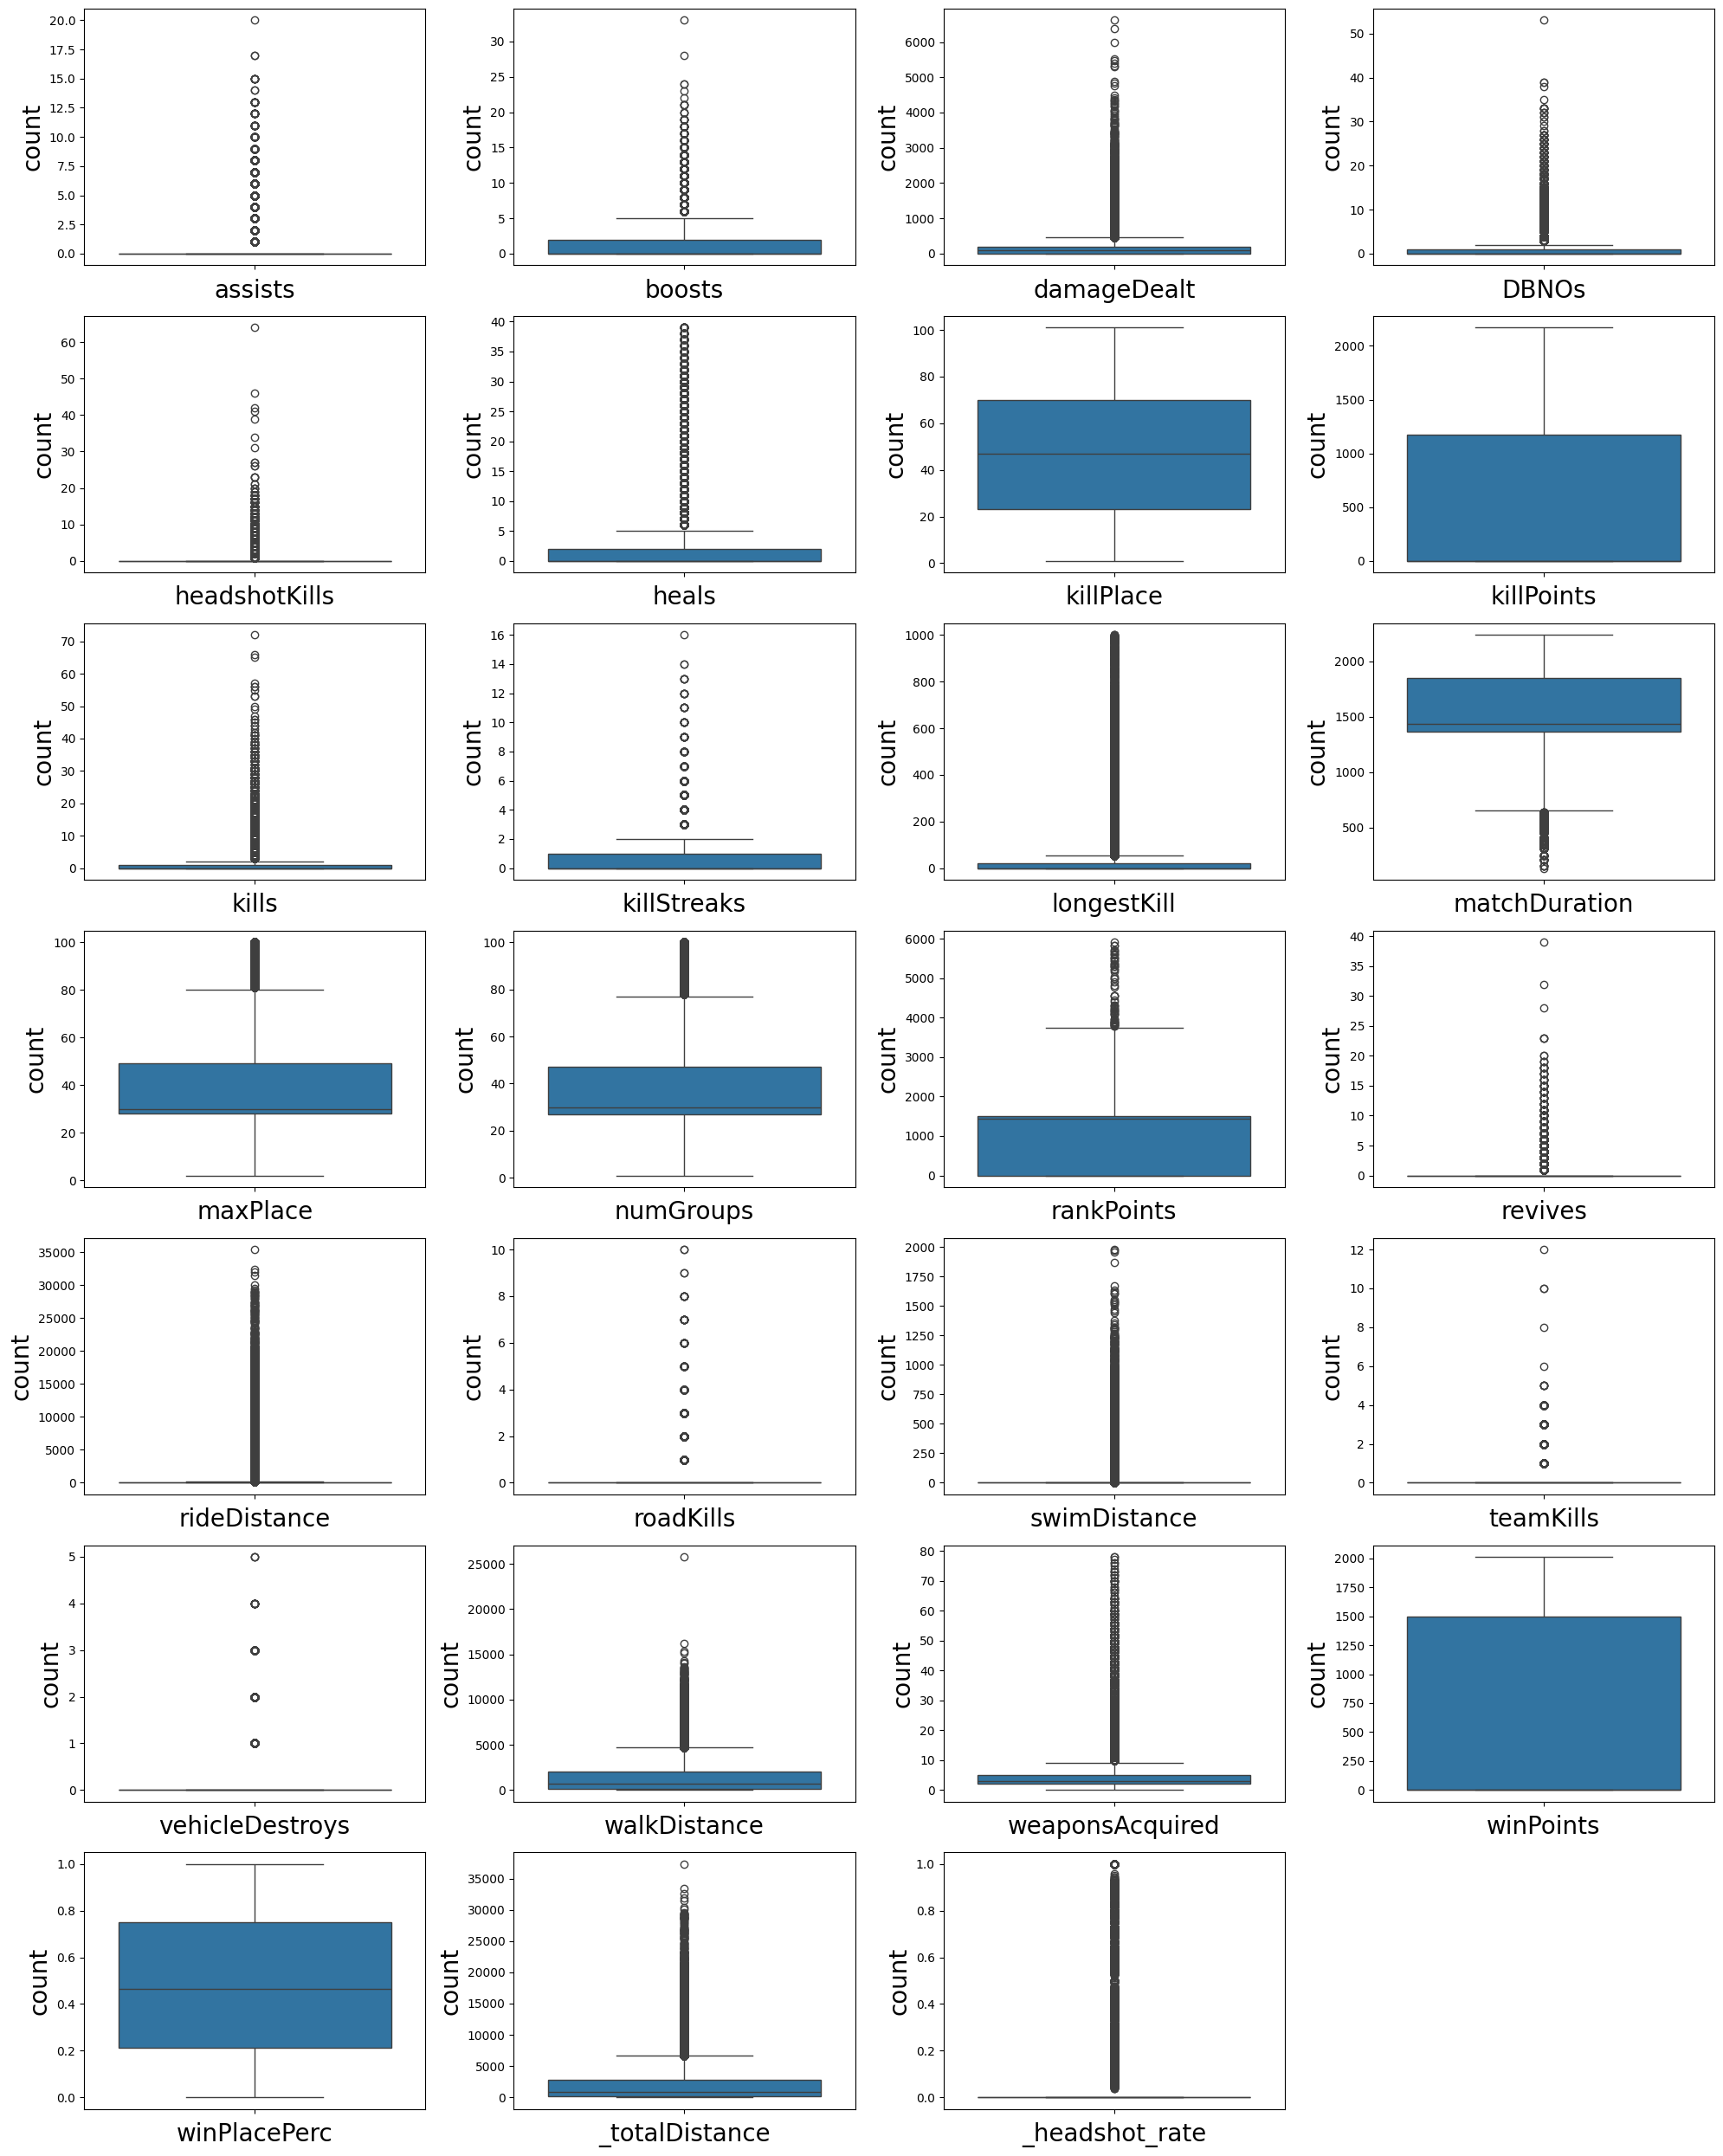

In [32]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

## scaling

In [33]:
# Scale features to ensure models perform optimally
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['damageDealt', 'killPoints', 'killPlace','matchDuration','maxPlace','numGroups','rankPoints','weaponsAcquired','winPoints','rideDistance', 'swimDistance', 'walkDistance', '_totalDistance']])

# Add the scaled features to the dataframe
data[['damageDealt', 'killPoints', 'killPlace','matchDuration','maxPlace','numGroups','rankPoints','weaponsAcquired','winPoints','rideDistance', 'swimDistance', 'walkDistance', '_totalDistance']] = scaled_features

In [34]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
0,0,0,-0.779700,0,0,0,0.486825,1.167753,0,0,...,0,-0.150812,0,0,-0.789982,-1.139448,1.157672,0.4444,-0.711879,0.0
1,0,0,-0.244353,0,0,0,0.375934,-0.806860,0,0,...,0,0.210903,0,0,0.214535,0.532089,-0.821761,0.6400,-0.163942,0.0
2,1,0,-0.381716,0,0,0,0.006298,-0.806860,0,0,...,0,-0.150812,0,0,-0.860092,-0.721564,-0.821761,0.7755,-0.749770,0.0
3,0,0,-0.587146,0,0,0,1.041279,-0.806860,0,0,...,0,-0.150812,0,0,-0.825544,-0.303680,-0.821761,0.1667,-0.731099,0.0
4,0,0,-0.194429,0,0,0,-0.067630,-0.806860,1,1,...,0,-0.150812,0,0,-0.954741,-0.721564,-0.821761,0.1875,-0.800923,0.0


## feature selection

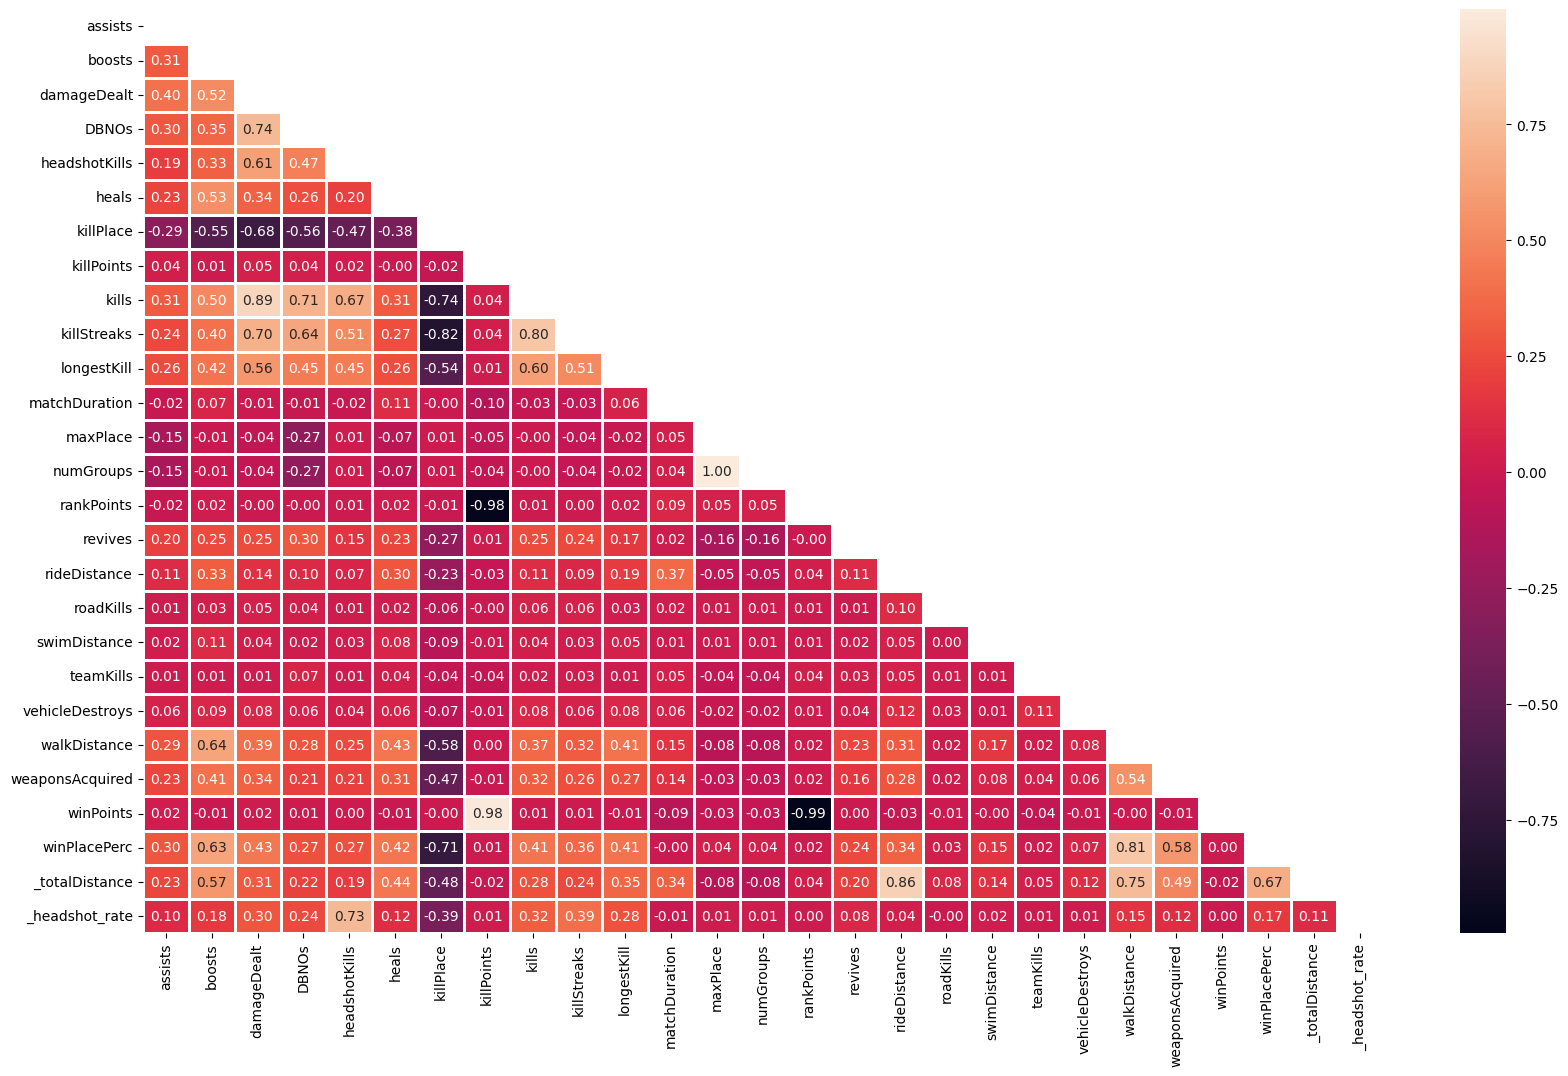

In [35]:
## No redundant fetaures
## We will check correlation
plt.figure(figsize=(20,12))
corr=data.corr()
mask =np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,linewidths=1,annot=True ,fmt ='.2f')
plt.show()

# split data into train ,test

In [35]:
# Split the dataset into features and target variable
X = data.drop(['winPlacePerc'], axis=1)  # Drop target variable
y = data['winPlacePerc']  # Target variable
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)

(3479496, 26)
(869874,)
(3479496,)
(869874, 26)


# create model

In [37]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model (optional: you can use metrics like R-squared)
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")

Linear Regression MSE: 0.015492492948756497
Linear Regression R-squared: 0.831181588481018


# XGBoost regressor

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")



XGBoost MSE: 0.007256668308625664
XGBoost R-squared: 0.9209256237305145


In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Neural Network MSE: {mse_mlp}")
print(f"Neural Network R-squared: {r2_mlp}")


Neural Network MSE: 0.007166382832150434
Neural Network R-squared: 0.9219094454286877


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with ReLU activation
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the test set
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MSE: {mse_nn}")
print(f"Neural Network R-squared: {r2_nn}")


Epoch 1/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 111s 1ms/step - loss: 0.0091
Epoch 2/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 110s 1ms/step - loss: 0.0072
Epoch 3/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 110s 1ms/step - loss: 0.0071
Epoch 4/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 111s 1ms/step - loss: 0.0070
Epoch 5/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 109s 1ms/step - loss: 0.0070
Epoch 6/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step - loss: 0.0070
Epoch 7/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 110s 1ms/step - loss: 0.0069
Epoch 8/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 111s 1ms/step - loss: 0.0069
Epoch 9/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step - loss: 0.0069
Epoch 10/10
108735/108735 ━━━━━━━━━━━━━━━━━━━━ 112s 1ms/step - loss: 0.0069
27184/27184 ━━━━━━━━━━━━━━━━━━━━ 17s 629us/step
Neural Network MSE: 0.006919617792016429
Neural Network R-squared: 0.9245983917610586


# Evaluate Models

In [40]:
# Calculate accuracy and F1 score for Linear Regression
from sklearn.metrics import accuracy_score, f1_score

# Convert continuous predictions to binary class labels
threshold = 0.5
y_pred_lr_class = (y_pred_lr >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)  # Ensure y_test is also binary

# Classification Metrics
accuracy_lr = accuracy_score(y_test_class, y_pred_lr_class)
f1_lr = f1_score(y_test_class, y_pred_lr_class)

print(f"Linear Regression Accuracy: {accuracy_lr}")
print(f"Linear Regression F1 Score: {f1_lr}")


Linear Regression Accuracy: 0.9073578472284491
Linear Regression F1 Score: 0.9006490904719929


In [42]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create the KNN model
knn_model = KNeighborsRegressor(n_neighbors=20)  # Adjust n_neighbors as needed

# Train the model
knn_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_pca)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN with PCA MSE: {mse_knn}")
print(f"KNN with PCA R-squared: {r2_knn}")


KNN with PCA MSE: 0.044152085007965726
KNN with PCA R-squared: 0.5188840891553155


In [43]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming y_pred_knn contains continuous values or probabilities
threshold = 0.5
y_pred_knn_class = (y_pred_knn >= threshold).astype(int)  # Convert to binary labels
y_test_class = (y_test >= threshold).astype(int)          # Ensure y_test is binary

# Classification Metrics
accuracy_knn = accuracy_score(y_test_class, y_pred_knn_class)
f1_knn = f1_score(y_test_class, y_pred_knn_class)

print(f"KNN with PCA Accuracy: {accuracy_knn}")
print(f"KNN with PCA F1 Score: {f1_knn}")



KNN with PCA Accuracy: 0.7718290235137503
KNN with PCA F1 Score: 0.7683678852015927


## Model Comparison and Conclusion

In [44]:
# Compare the models based on accuracy and F1 score
print(f"Linear Regression vs XGBRegressor vs KNN")
print(f"Linear Regression Accuracy: {accuracy_lr} | F1 Score: {f1_lr}")


Linear Regression vs XGBRegressor vs KNN
Linear Regression Accuracy: 0.9073578472284491 | F1 Score: 0.9006490904719929


so we can conclude that XGBRegressor perform better in this dataset.so we prefer that model

## If we convert target variable into binary

In [38]:
# Set a threshold to classify as 'win' (1) or 'non-win' (0)
threshold = 0.5

# Convert the continuous 'winplaceperc' to binary classification
data['win'] = (data['winPlacePerc'] >= threshold).astype(int)

# Now, 'df['win']' will have 1 for winner and 0 for non-winner
# Optionally drop 'winplaceperc' if you no longer need it
# df = df.drop(columns=['winplaceperc'])

# Check the first few rows
print(data[['winPlacePerc', 'win']].head())


   winPlacePerc  win
0        0.4444    0
1        0.6400    1
2        0.7755    1
3        0.1667    0
4        0.1875    0


In [39]:
data['win'] = data['win']
print(data[['winPlacePerc', 'win']].head())


   winPlacePerc  win
0        0.4444    0
1        0.6400    1
2        0.7755    1
3        0.1667    0
4        0.1875    0


In [40]:
print(data.columns)  # Check column names in data1


Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', '_totalDistance', '_headshot_rate', 'win'],
      dtype='object')


In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Features (X) and target (y)
X = data.drop(columns=['winPlacePerc', 'win'])  # Drop 'winplaceperc' and 'win' if you have them in your DataFrame
y = data['win']  # Binary target variable (0 or 1 for non-winner or winner)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBClassifier model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the evaluation results
print(f"XGBoost Classifier Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")


XGBoost Classifier Accuracy: 0.9387026167008096
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    453832
           1       0.94      0.93      0.94    416042

    accuracy                           0.94    869874
   macro avg       0.94      0.94      0.94    869874
weighted avg       0.94      0.94      0.94    869874



In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

# Output the evaluation results
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Classification Report:\n{classification_rep_logreg}")


Logistic Regression Accuracy: 0.9112216252008911
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92    453832
           1       0.91      0.90      0.91    416042

    accuracy                           0.91    869874
   macro avg       0.91      0.91      0.91    869874
weighted avg       0.91      0.91      0.91    869874



## conclusion :

#### we concluded that XGBoost performed the best in terms of predictive accuracy, and it is the best choice for production.

